In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
# Load PRESCRIPTIONS data
prescriptions = pd.read_csv('data/PRESCRIPTIONS.csv')
# Load D_ITEMS data
d_items = pd.read_csv('data/D_ITEMS.csv')
# Load ADMISSIONS data
admissions = pd.read_csv('data/ADMISSIONS.csv')
# Load ICUSTAYS data
icustays = pd.read_csv('data/ICUSTAYS.csv')
# Load PATIENTS data
patients = pd.read_csv('data/PATIENTS.csv')

from datetime import datetime
df = patients
# Calculate age function
def calculate_age(dob, dod):
    dob_date = datetime.strptime(dob, "%Y-%m-%d %H:%M:%S")
    dod_date = datetime.strptime(dod, "%Y-%m-%d %H:%M:%S")
    age = (dod_date - dob_date).days // 365
    return age

# Apply calculate_age function to create "age" column
df["age"] = df.apply(lambda row: calculate_age(row["dob"], row["dod"]), axis=1)

# Filter out rows with age greater than or equal to 120
filtered_df = df[df["age"] < 120]

# Display the updated DataFrame
print(filtered_df.head())
# Merge admissions and patients data on subject_id
merged_data = pd.merge(admissions, filtered_df, on="subject_id")
merged_data.head()

   row_id  subject_id gender                  dob                  dod  \
0    9467       10006      F  2094-03-05 00:00:00  2165-08-12 00:00:00   
1    9472       10011      F  2090-06-05 00:00:00  2126-08-28 00:00:00   
2    9474       10013      F  2038-09-03 00:00:00  2125-10-07 00:00:00   
3    9478       10017      F  2075-09-21 00:00:00  2152-09-12 00:00:00   
4    9479       10019      M  2114-06-20 00:00:00  2163-05-15 00:00:00   

              dod_hosp              dod_ssn  expire_flag  age  
0  2165-08-12 00:00:00  2165-08-12 00:00:00            1   71  
1  2126-08-28 00:00:00                  NaN            1   36  
2  2125-10-07 00:00:00  2125-10-07 00:00:00            1   87  
3                  NaN  2152-09-12 00:00:00            1   77  
4  2163-05-15 00:00:00  2163-05-15 00:00:00            1   48  


,row_id_x,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,...,hospital_expire_flag,has_chartevents_data,row_id_y,gender,dob,dod,dod_hosp,dod_ssn,expire_flag,age
0,12258,10006,142345,2164-10-23 21:09:00,2164-11-01 17:15:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,Medicare,...,0,1,9467,F,2094-03-05 00:00:00,2165-08-12 00:00:00,2165-08-12 00:00:00,2165-08-12 00:00:00,1,71
1,12263,10011,105331,2126-08-14 22:32:00,2126-08-28 18:59:00,2126-08-28 18:59:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Private,...,1,1,9472,F,2090-06-05 00:00:00,2126-08-28 00:00:00,2126-08-28 00:00:00,NaN,1,36
2,12265,10013,165520,2125-10-04 23:36:00,2125-10-07 15:13:00,2125-10-07 15:13:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,...,1,1,9474,F,2038-09-03 00:00:00,2125-10-07 00:00:00,2125-10-07 00:00:00,2125-10-07 00:00:00,1,87
3,12269,10017,199207,2149-05-26 17:19:00,2149-06-03 18:42:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,...,0,1,9478,F,2075-09-21 00:00:00,2152-09-12 00:00:00,NaN,2152-09-12 00:00:00,1,77
4,12270,10019,177759,2163-05-14 20:43:00,2163-05-15 12:00:00,2163-05-15 12:00:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,...,1,1,9479,M,2114-06-20 00:00:00,2163-05-15 00:00:00,2163-05-15 00:00:00,2163-05-15 00:00:00,1,48


Display the head of the prescriptions and d_items DataFrames to confirm they are loaded correctly.

In [15]:
display(prescriptions.head())
display(d_items.head())

,row_id,subject_id,hadm_id,icustay_id,startdate,enddate,drug_type,drug,drug_name_poe,drug_name_generic,formulary_drug_cd,gsn,ndc,prod_strength,dose_val_rx,dose_unit_rx,form_val_disp,form_unit_disp,route
0,32600,42458,159647,NaN,2146-07-21 00:00:00,2146-07-22 00:00:00,MAIN,Pneumococcal Vac Polyvalent,Pneumococcal Vac Polyvalent,PNEUMOcoccal Vac Polyvalent,PNEU25I,48548.0,6494300.0,25mcg/0.5mL Vial,0.5,mL,1,VIAL,IM
1,32601,42458,159647,NaN,2146-07-21 00:00:00,2146-07-22 00:00:00,MAIN,Bisacodyl,Bisacodyl,Bisacodyl,BISA5,2947.0,536338101.0,5 mg Tab,10,mg,2,TAB,PO
2,32602,42458,159647,NaN,2146-07-21 00:00:00,2146-07-22 00:00:00,MAIN,Bisacodyl,Bisacodyl,Bisacodyl (Rectal),BISA10R,2944.0,574705050.0,10mg Suppository,10,mg,1,SUPP,PR
3,32603,42458,159647,NaN,2146-07-21 00:00:00,2146-07-22 00:00:00,MAIN,Senna,Senna,Senna,SENN187,19964.0,904516561.0,1 Tablet,1,TAB,1,TAB,PO
4,32604,42458,159647,NaN,2146-07-21 00:00:00,2146-07-21 00:00:00,MAIN,Docusate Sodium (Liquid),Docusate Sodium (Liquid),Docusate Sodium (Liquid),DOCU100L,3017.0,121054410.0,100mg UD Cup,100,mg,1,UDCUP,PO


,row_id,itemid,label,abbreviation,dbsource,linksto,category,unitname,param_type,conceptid
0,1,1435,Sustained Nystamus,NaN,carevue,chartevents,NaN,NaN,NaN,NaN
1,2,1436,Tactile Disturbances,NaN,carevue,chartevents,NaN,NaN,NaN,NaN
2,3,1437,Tremor,NaN,carevue,chartevents,NaN,NaN,NaN,NaN
3,4,1438,Ulnar Pulse [Right],NaN,carevue,chartevents,NaN,NaN,NaN,NaN
4,5,1439,Visual Disturbances,NaN,carevue,chartevents,NaN,NaN,NaN,NaN


Merge the PRESCRIPTIONS and D_ITEMS DataFrames to link prescription items to their descriptions. Merge the result with the ADMISSIONS DataFrame to include admission details. Use ndc from PRESCRIPTIONS and itemid from D_ITEMS for the merge, and hadm_id from both PRESCRIPTIONS and ADMISSIONS for the final merge.



In [16]:
# Merge prescriptions with d_items on itemid
prescriptions_merged_items = pd.merge(prescriptions, d_items, left_on='ndc', right_on='itemid', how='left')

# Merge prescriptions_merged_items with admissions on hadm_id
merged_prescriptions_admissions = pd.merge(prescriptions_merged_items, admissions, left_on='hadm_id', right_on='hadm_id', how='left')

# Display the first few rows of the final merged DataFrame
display(merged_prescriptions_admissions.head())

,row_id_x,subject_id_x,hadm_id,icustay_id,startdate,enddate,drug_type,drug,drug_name_poe,drug_name_generic,...,insurance,language,religion,marital_status,ethnicity,edregtime,edouttime,diagnosis,hospital_expire_flag,has_chartevents_data
0,32600,42458,159647,NaN,2146-07-21 00:00:00,2146-07-22 00:00:00,MAIN,Pneumococcal Vac Polyvalent,Pneumococcal Vac Polyvalent,PNEUMOcoccal Vac Polyvalent,...,Medicare,ENGL,JEWISH,MARRIED,WHITE,2146-07-21 11:13:00,2146-07-21 15:59:00,PNEUMONIA,0,1
1,32601,42458,159647,NaN,2146-07-21 00:00:00,2146-07-22 00:00:00,MAIN,Bisacodyl,Bisacodyl,Bisacodyl,...,Medicare,ENGL,JEWISH,MARRIED,WHITE,2146-07-21 11:13:00,2146-07-21 15:59:00,PNEUMONIA,0,1
2,32602,42458,159647,NaN,2146-07-21 00:00:00,2146-07-22 00:00:00,MAIN,Bisacodyl,Bisacodyl,Bisacodyl (Rectal),...,Medicare,ENGL,JEWISH,MARRIED,WHITE,2146-07-21 11:13:00,2146-07-21 15:59:00,PNEUMONIA,0,1
3,32603,42458,159647,NaN,2146-07-21 00:00:00,2146-07-22 00:00:00,MAIN,Senna,Senna,Senna,...,Medicare,ENGL,JEWISH,MARRIED,WHITE,2146-07-21 11:13:00,2146-07-21 15:59:00,PNEUMONIA,0,1
4,32604,42458,159647,NaN,2146-07-21 00:00:00,2146-07-21 00:00:00,MAIN,Docusate Sodium (Liquid),Docusate Sodium (Liquid),Docusate Sodium (Liquid),...,Medicare,ENGL,JEWISH,MARRIED,WHITE,2146-07-21 11:13:00,2146-07-21 15:59:00,PNEUMONIA,0,1


Determine the most common medications prescribed.
Count the occurrences of each unique value in the 'drug' column and get the top 10 most frequent medications.

In [17]:
top_10_medications = merged_prescriptions_admissions['drug'].value_counts().head(10)
print(top_10_medications)

drug
Potassium Chloride      529
D5W                     439
0.9% Sodium Chloride    409
NS                      362
Furosemide              346
Insulin                 300
Iso-Osmotic Dextrose    265
5% Dextrose             256
SW                      244
Magnesium Sulfate       206
Name: count, dtype: int64


## Visualization 1

Create a bar plot to show the top 10 most common medications.



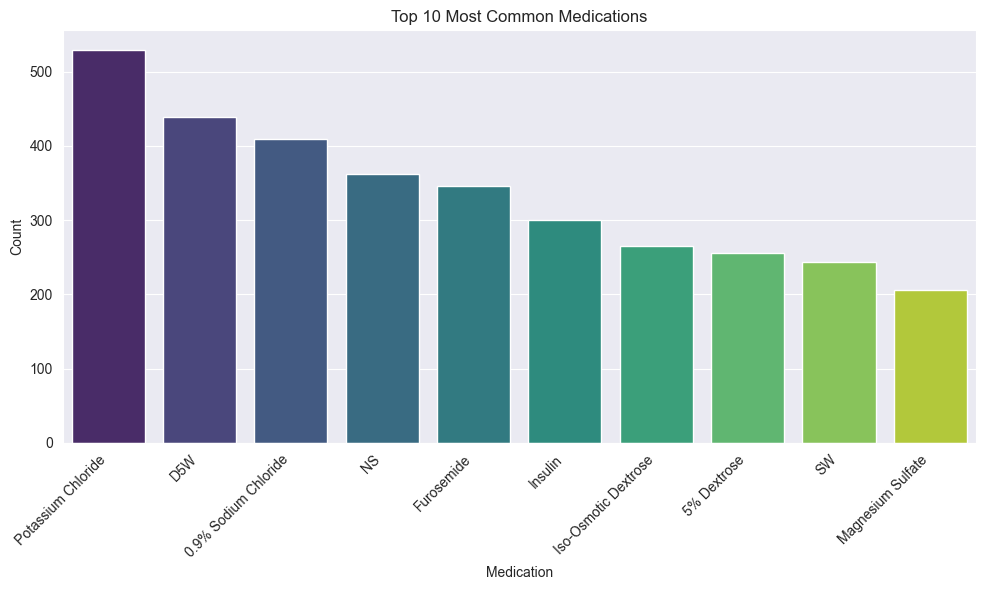

In [18]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_medications.index, y=top_10_medications.values, palette="viridis", hue=top_10_medications.index, legend=False)
plt.title("Top 10 Most Common Medications")
plt.xlabel("Medication")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Analyze medication by admission type

Group the data by admission type and medication to find the most common medications for each admission type.

In [19]:
# Group by admission type and drug, and count occurrences
grouped_medications = merged_prescriptions_admissions.groupby(['admission_type', 'drug']).size().reset_index(name='count')

# Unstack to have admission types as columns
unstacked_medications = grouped_medications.pivot_table(index='drug', columns='admission_type', values='count').fillna(0)

# Get the top 5 most frequent medications for each admission type
top_medications_by_admission = {}
for col in unstacked_medications.columns:
    top_medications_by_admission[col] = unstacked_medications.sort_values(by=col, ascending=False)[col].head(5)

# Print the top medications for each admission type
for admission_type, medications in top_medications_by_admission.items():
    print(f"Top 5 medications for {admission_type}:")
    print(medications)
    print("\n")

Top 5 medications for ELECTIVE:
drug
Potassium Chloride     34.0
Metoprolol Tartrate    24.0
Amiodarone             18.0
Magnesium Sulfate      18.0
Furosemide             18.0
Name: ELECTIVE, dtype: float64


Top 5 medications for EMERGENCY:
drug
Potassium Chloride      494.0
D5W                     426.0
0.9% Sodium Chloride    394.0
NS                      346.0
Furosemide              328.0
Name: EMERGENCY, dtype: float64


Top 5 medications for URGENT:
drug
Lorazepam              5.0
NS                     3.0
Amiodarone HCl         2.0
Potassium Phosphate    2.0
Morphine Sulfate       2.0
Name: URGENT, dtype: float64




### Visualization 2

Create a grouped bar plot or a set of bar plots to show the top medications for different admission types.


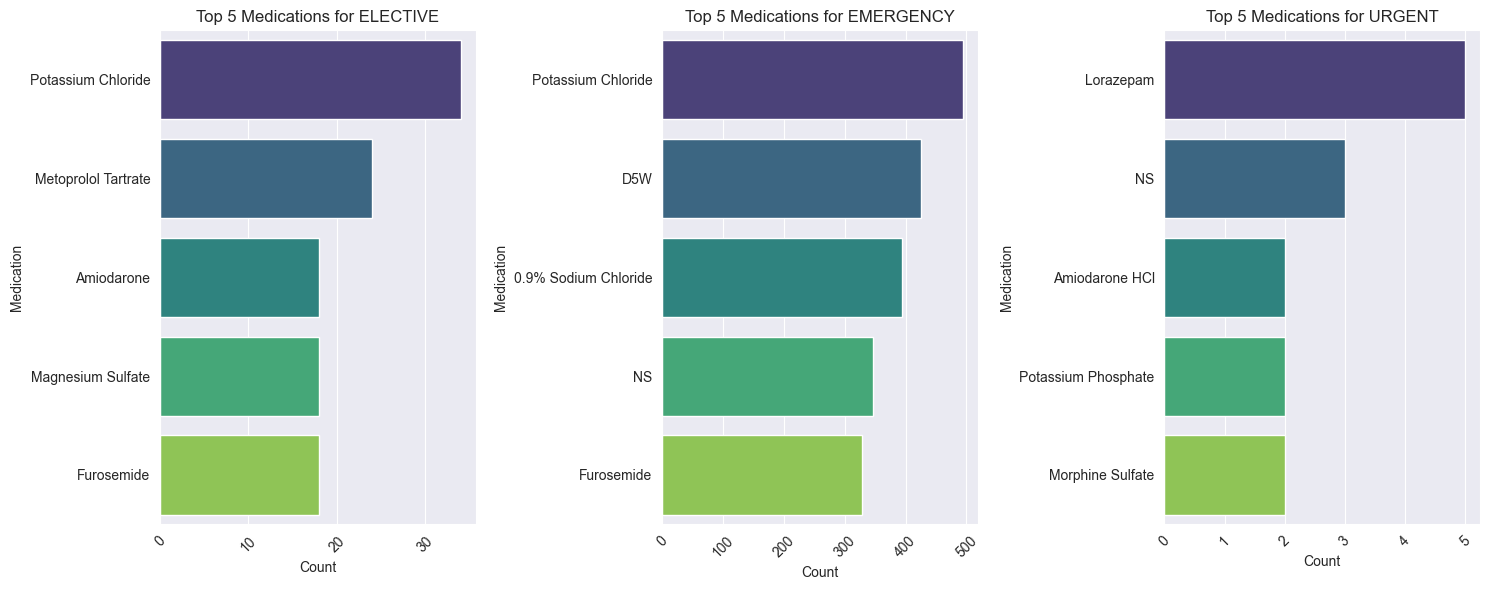

In [20]:
# Create a figure with subplots, one for each admission type
fig, axes = plt.subplots(1, len(top_medications_by_admission), figsize=(15, 6), sharey=False)

# Iterate through the top medications for each admission type and create a bar plot
for i, (admission_type, medications) in enumerate(top_medications_by_admission.items()):
    sns.barplot(x=medications.values, y=medications.index, ax=axes[i], palette='viridis', hue=medications.index, legend=False)
    axes[i].set_title(f"Top 5 Medications for {admission_type}")
    axes[i].set_xlabel("Count")
    axes[i].set_ylabel("Medication")
    axes[i].tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlapping titles and labels
plt.tight_layout()

# Show the plot
plt.show()

Analyze length of stay by admission type and insurance

Group the merged data by admission type and insurance and calculate the mean length of stay.

In [21]:
# Merge icustays and admissions on hadm_id
merged_icu_admissions = pd.merge(icustays, admissions, on='hadm_id', how='inner')

# Group the merged data by admission type and insurance and calculate the mean length of stay
los_by_admission_insurance = merged_icu_admissions.groupby(['admission_type', 'insurance'])['los'].mean().reset_index()

# Display the first few rows of the resulting DataFrame
display(los_by_admission_insurance.head())

,admission_type,insurance,los
0,ELECTIVE,Medicare,2.563620
1,ELECTIVE,Private,3.764067
2,EMERGENCY,Government,0.944700
3,EMERGENCY,Medicaid,8.407317
4,EMERGENCY,Medicare,3.981761


### Visualization 3: Visualize length of stay

Create a grouped bar plot to compare the mean length of stay across different admission types and insurance types.

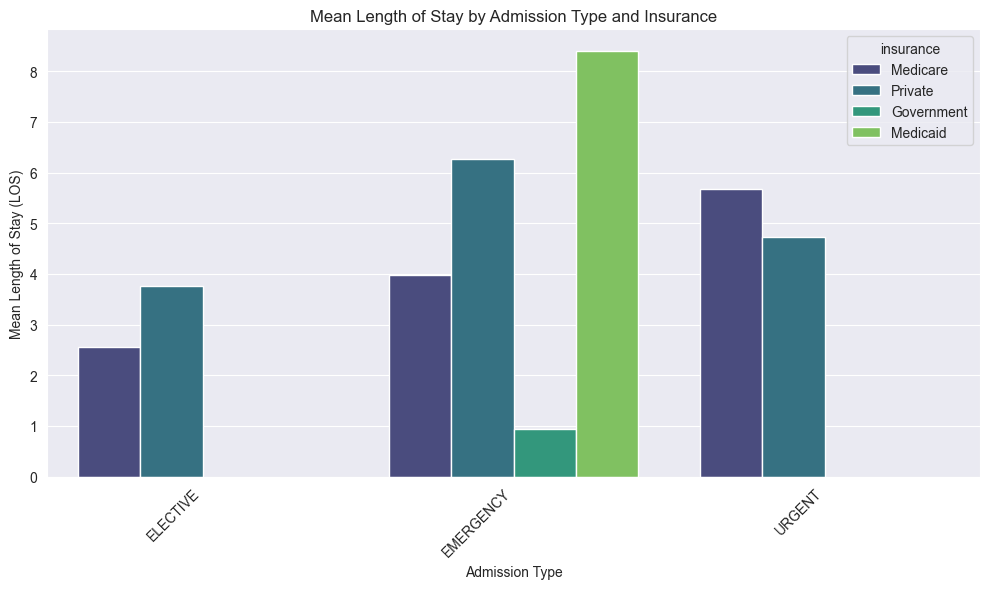

In [22]:
plt.figure(figsize=(10, 6))
sns.barplot(data=los_by_admission_insurance, x='admission_type', y='los', hue='insurance', palette='viridis')
plt.title("Mean Length of Stay by Admission Type and Insurance")
plt.xlabel("Admission Type")
plt.ylabel("Mean Length of Stay (LOS)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Visualization 4: Visualize patient count

Create a heatmap to show the distribution of patients across ethnicity and insurance.

,ethnicity,insurance,count
0,AMERICAN INDIAN/ALASKA NATIVE FEDERALLY RECOGN...,Medicaid,2
1,ASIAN,Medicare,2
2,BLACK/AFRICAN AMERICAN,Medicare,5
3,HISPANIC OR LATINO,Medicare,2
4,HISPANIC/LATINO - PUERTO RICAN,Medicare,15


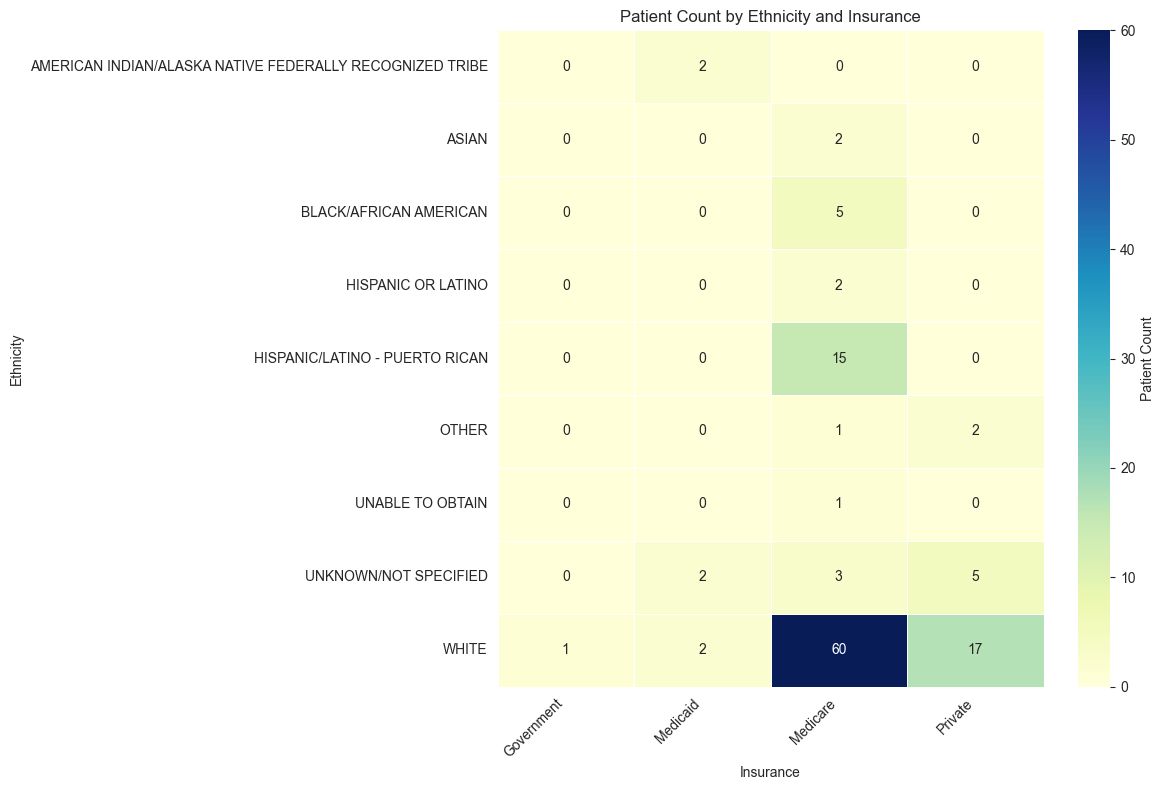

In [23]:

patient_count_ethnicity_insurance = merged_data.groupby(['ethnicity', 'insurance']).size().reset_index(name='count')
display(patient_count_ethnicity_insurance.head())


# Create a pivot table
pivot_table = patient_count_ethnicity_insurance.pivot_table(index='ethnicity', columns='insurance', values='count').fillna(0)

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt=".0f", linewidths=.5, cbar_kws={"label": "Patient Count"})
plt.title("Patient Count by Ethnicity and Insurance")
plt.xlabel("Insurance")
plt.ylabel("Ethnicity")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

### Visualization 5: Analyze patient count by religion and insurance

Group the merged data by religion and insurance and count the number of patients in each group.

,religion,insurance,count
0,BUDDHIST,Medicare,1
1,CATHOLIC,Medicaid,2
2,CATHOLIC,Medicare,43
3,CATHOLIC,Private,13
4,CHRISTIAN SCIENTIST,Medicare,3


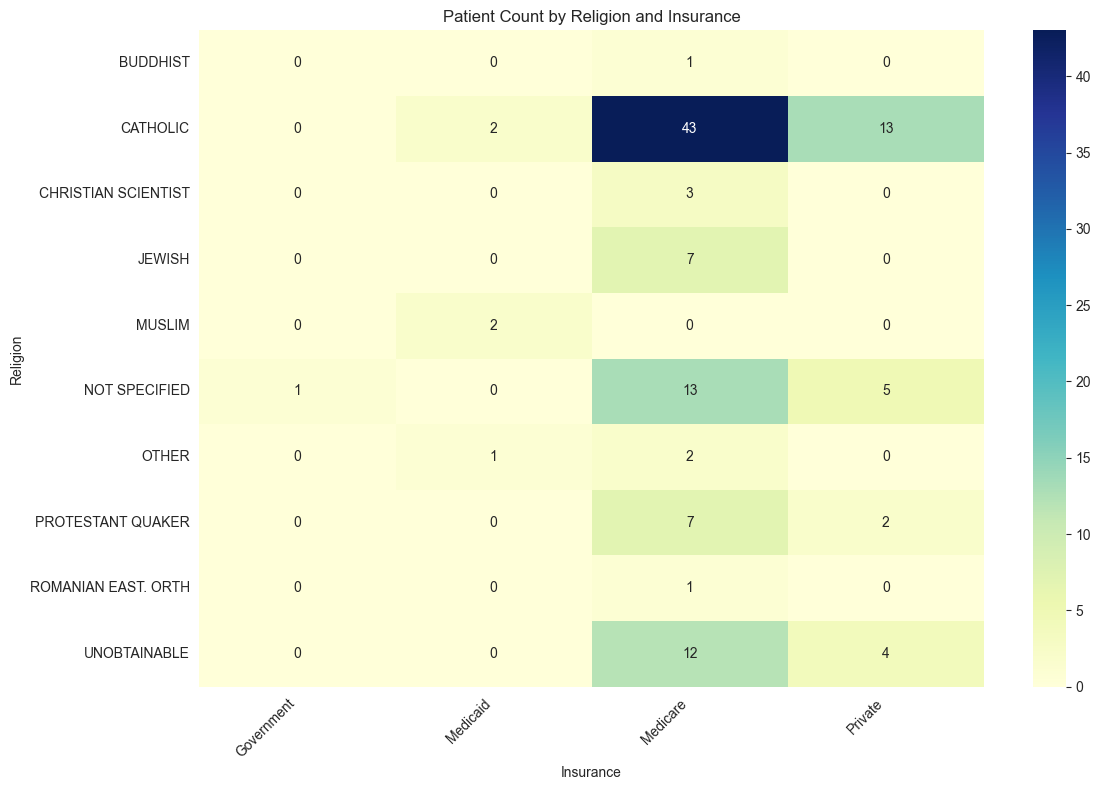

In [24]:
patient_count_religion_insurance = merged_data.groupby(['religion', 'insurance']).size().reset_index(name='count')
display(patient_count_religion_insurance.head())

# Create a pivot table from the patient_count_religion_insurance DataFrame
pivot_table = patient_count_religion_insurance.pivot_table(index='religion', columns='insurance', values='count').fillna(0)

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt='g', cmap='YlGnBu')

# Set the title and labels
plt.title("Patient Count by Religion and Insurance")
plt.xlabel("Insurance")
plt.ylabel("Religion")

# Rotate the x-axis tick labels and adjust layout
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot
plt.show()